# a)

In [ ]:
Pkg.add("PyPlot")

In [1]:
using PyPlot

In [ ]:
#Pkg.update()

Suppose we have a sinusoid function

In [2]:
f(x) = 10*sin(x)

f (generic function with 1 method)

Our dataset $\mathcal D$ will consist of seven datapoints drawn from the following probabilistic model. 

For each datapoint we randomly draw $x_i$ uniformly in [0,6] and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution.

In [ ]:
#using StatsBase

In [34]:
n = 7
D = Array{Float64}(n, 2) # size n by 2
srand(3)
x = 6*rand(n) # n by 1
y = f(x) + randn(n) # n by 1
D = [x y]

7×2 Array{Float64,2}:
 4.87019   -9.87773 
 5.93059   -2.44452 
 4.84573   -9.06701 
 5.82055   -3.30505 
 0.840367   6.97372 
 3.05666    0.603666
 0.352184   3.52136 

Plot the dataset $\mathcal D$ and the true function $f(x)$.

In [11]:
"""plot function y=f(x)"""
function plotfunc(f;
    _color="black", xmin=0,xmax=6,nsamples=1000)
    xsamples = linspace(xmin,xmax,nsamples)
    plot(xsamples, [f(x) for x in xsamples], color=_color)
end

plotfunc

# b)

Fit a linear model to $\mathcal D$

In [35]:
X = [ones(length(x))  x]
Y = y
w = X\Y #   5.74879 -2.0935
@show w

w = [5.74879,-2.0935]


2-element Array{Float64,1}:
  5.74879
 -2.0935 

Plot the linear model $l(x)$ together with $\mathcal D$ and $f(x)$. Feel free to use our method $\verb|plotfunc(f)|$.

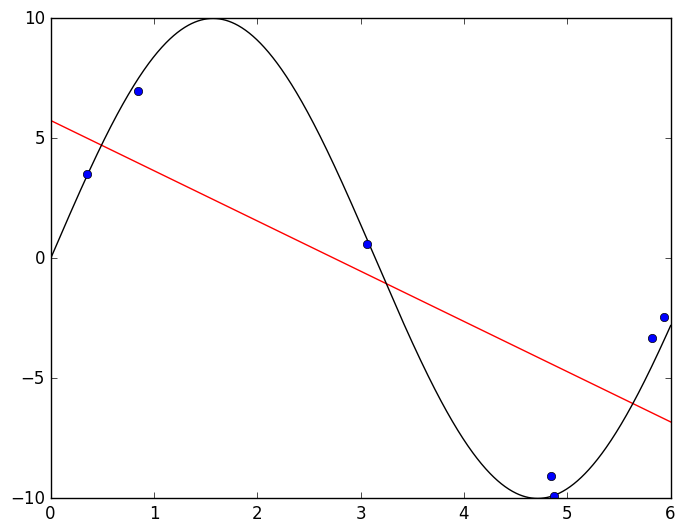

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000260E0940>

 at In[36]:1.


In [36]:
l(x) = w[1] + w[2]*x

plotfunc(x->l(x),_color = "red")
plotfunc(x->f(x))
plot(x,y,"o")

# c)

Fit a cubic model $c(x)$ to $\mathcal D$

In [37]:
X = [ones(length(x))  x x.^2 x.^3]
Y = y
w = X\Y # 24.2686   1.69753   -5.19878    0.699035

4-element Array{Float64,1}:
 -2.1586  
 17.915   
 -8.35826 
  0.899461

Plot the cubic model with $\mathcal D$ and $f(x)$

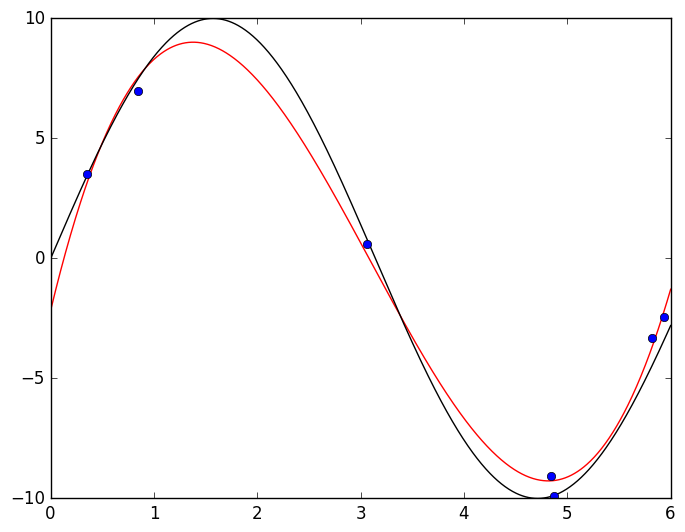

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000262B20F0>

) in module Main at In[21]:1 overwritten at In[38]:1.


In [38]:
c(x) = w[1] + w[2]*x + w[3]*x^2 + w[4]* x^3
plotfunc(x->c(x), _color= "red")
plotfunc(x->f(x))
plot(x,y,"o")

# d)

Repat the parts (b) and (c) for 1000 different sets $\mathcal D$. Compute $\bar{l}$ and $\bar{c}$, the average linear and average cubic models.

In [39]:
srand(3)
num_samples = 1000
l_w = zeros(num_samples,2)
c_w = zeros(num_samples,4)


1000×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 ⋮                 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [23]:
srand(2)
for i in 1:num_samples
    x = rand(0:6,n,1) # n by 1
    y = f(x) + randn(n) # n by 1
    
    # linear
    X = [ones(length(x))  x]
    Y = y
    w = X\Y
    l_w[i,:]=w
    
    # cubic
    X2 = [ones(length(x)) x x.^2 x.^3]
    w2 = X2\Y
   
    c_w[i,:]=w2
    
end
l_avg_w1 = mean(l_w,1)[1]
l_avg_w2 = mean(l_w,1)[2]
@show l_avg_w1 l_avg_w2  #l_avg_w1 = 7.335306083746143 l_avg_w2 = -2.4346025731417966
l_avg(x) = l_avg_w1+ l_avg_w2*x


c_avg_w1 = mean(c_w,1)[1]
c_avg_w2 = mean(c_w,1)[2]
c_avg_w3 = mean(c_w,1)[3]
c_avg_w4 = mean(c_w,1)[4]
@show c_avg_w1 c_avg_w2 c_avg_w3 c_avg_w4 # -0.7193733287040367 17.215912110451008 -7.945655325863566 0.8136499685407862

c_avg(x) = c_avg_w1 + c_avg_w2*x+ c_avg_w3 * x.^2 + c_avg_w4 * x.^3

l_avg_w1 = 7.335306083746143
l_avg_w2 = -2.4346025731417966
c_avg_w1 = -0.7193733287040367
c_avg_w2 = 17.215912110451008
c_avg_w3 = -7.945655325863566
c_avg_w4 = 0.8136499685407862


c_avg (generic function with 1 method)

Plot $\bar{l}$ together with $f(x)$.

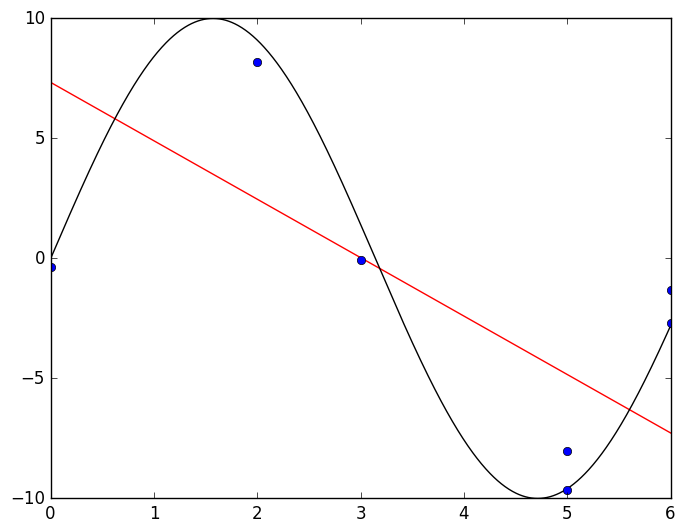

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000026DE278>

In [24]:
plotfunc(x->l_avg(x), _color="red")
plotfunc(x->f(x))
plot(x,y,"o")

Plot $\bar{c}(x)$ together with $f(x)$.

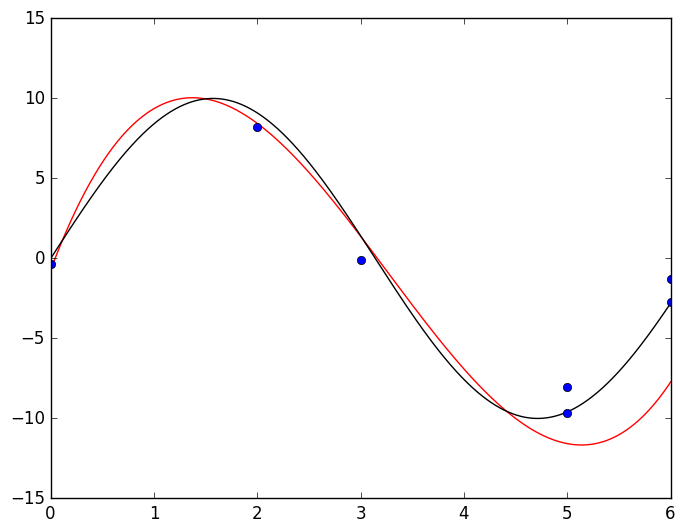

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002749DD8>

In [25]:
plotfunc(x->c_avg(x),_color = "red")
plotfunc(x->f(x))
plot(x,y,"o")


# e)

Compute the bias of $\bar{l}$. You can use our integrate function.

In [26]:
function integrate(f, a, b)
    n = 1000
    delta = (b - a)/n;		   ## nothing to change below here
    xs = a + (0:n-1) * delta;          ## n, right is 1:n * delta 
    fx = map(f, xs);  
    return sum(fx) * delta
end

integrate (generic function with 1 method)

We can interpret the bias as how far off our averaged model is from the true function. One way to visually see this is by plotting $\bar{l}(x)$ with $f(x)$ and color in their difference. Try out the plotting function below.

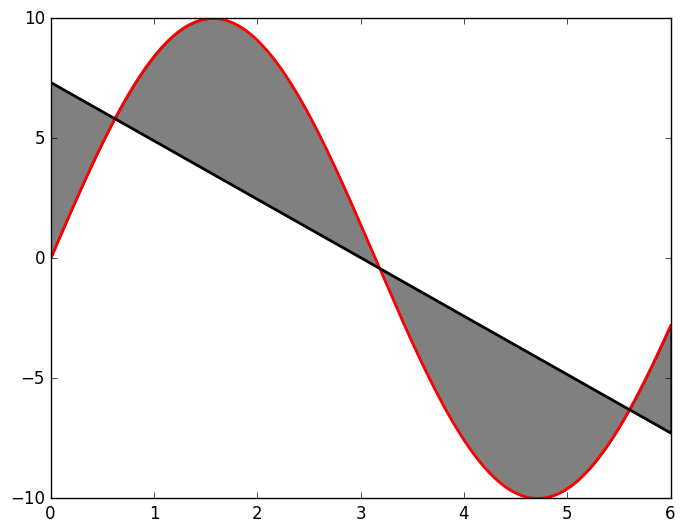

PyObject <matplotlib.collections.PolyCollection object at 0x0000000019AA4C50>

  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\User\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\User\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\User\.julia\v0.5\PyCall\sr

In [27]:
x = linspace(0,6,1000)
y = f(x) 
y_2 = l_avg(x) 
plot(x, y, color="red", linewidth=2.0) # true function
plot(x, y_2, color="black", linewidth=2.0)
fill_between(x, y_2, y, facecolor="grey", interpolate=true)



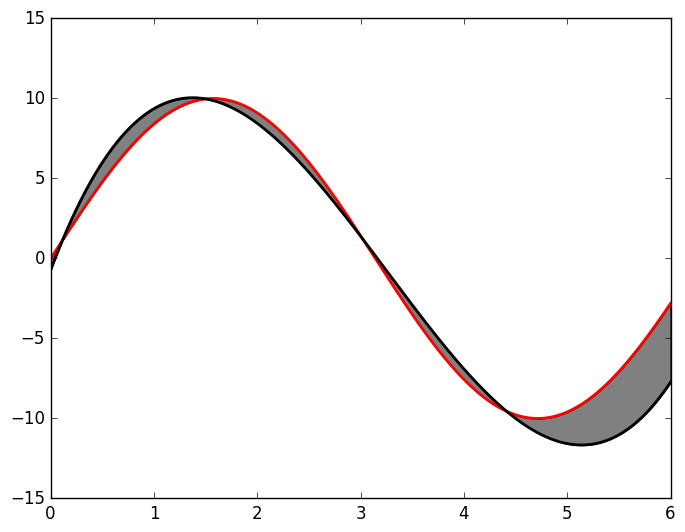

PyObject <matplotlib.collections.PolyCollection object at 0x0000000019B25588>

In [28]:
y_3 = c_avg(x)
plot(x, y, color="red", linewidth=2.0) # true function
plot(x, y_3, color="black", linewidth=2.0)
fill_between(x, y_3, y, facecolor="grey", interpolate=true)

Compute the squared bias of the linear and cubic models $\bar {l}(x)$, $\bar{c}(x)$.

In [ ]:
#Pkg.add("SymPy")
#using SymPy

In [29]:
using SymPy # for the integrate function

In [30]:
@show l_avg_w1 
@show l_avg_w2
bias_lfunction(k) = (l_avg_w1 + l_avg_w2 *k - 10*sin(k))^2

l_avg_w1 = 7.335306083746143
l_avg_w2 = -2.4346025731417966


bias_lfunction (generic function with 1 method)

In [31]:
l_bias = SymPy.integrate(bias_lfunction,0.0,6.0) /6 # 20.0244912636096


20.0244912636096

In [32]:
@show c_avg_w1
@show c_avg_w2
@show c_avg_w3
@show c_avg_w4 
bias_cfunct(k) = (c_avg_w1 + c_avg_w2 *k + c_avg_w3 * k^2 +c_avg_w4 * k^3  - 10*sin(k))^2
@show c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 #2.97857882279679




c_avg_w1 = -0.7193733287040367
c_avg_w2 = 17.215912110451008
c_avg_w3 = -7.945655325863566
c_avg_w4 = 0.8136499685407862
c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 = 2.97857882279684


2.97857882279684

Which model has smaller bias?

Cubic model has smaller bias^2 (2.98). Linear model has a larger bias^2 (20.02).

# f)

Next compute the variance of the linear model.

In [19]:
l_var = 0

for i in 1:num_samples
    l_gdminusgbar(k) = (l_w[i,1]+ l_w[i,2]*k - l_avg_w1 -l_avg_w2 *k)^2
    l_var = l_var + SymPy.integrate(l_gdminusgbar,0.0,6.0) / 6
end

l_var = l_var /num_samples # 11.2708801006516


LoadError: LoadError: UndefVarError: num_samples not defined
while loading In[19], in expression starting on line 3

Compute the variance of the cubic model.

In [ ]:
c_var = 0

for i in 1:num_samples
    c_gdminusgbar(k) = (c_w[i,1]+ c_w[i,2]*k + c_w[i,3]*k^2 + c_w[i,4]*k^3- c_avg_w1 -c_avg_w2 *k - c_avg_w3*k^2 - c_avg_w4*k^3)^2
    c_var = c_var + SymPy.integrate(c_gdminusgbar,0.0,6.0) / 6
end

c_var = c_var /num_samples # 93.7134123359662


In [ ]:
@show mean(l_w,1)
@show var(l_w,1)
@show mean(c_w,1)
@show var(c_w,1)

Which model had higher variance? How do you interpret this? Which model has smaller overall error?

The cubic model has a higher variance. Due to the bias-variance tradeoff, the cubic model has a lower bias but larger variance. 
Model error is computed as the noise + bias^2 + variance. From below, the LINEAR model has a smaller overall error since noise is the same for both models. 

In [ ]:
@show l_error = l_bias + l_var # 31.2953713642613
@show c_error = c_bias + c_var # 96.6919911587630

# g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model has smaller overall error?

I need 8 points in the data set for the cubic model to have a smaller error.

When n = 7

l_error = 31.2953713642613

c_error = 96.6919911587630

When n = 8

l_error = 28.9122827079069

c_error = 19.6689353763512



In [ ]:
n = 8
srand(3)
num_samples = 1000
l_w = zeros(num_samples,2)
c_w = zeros(num_samples,4)

srand(2)
for i in 1:num_samples
    x = rand(0:6,n,1) # n by 1
    y = f(x) + randn(n) # n by 1
    X = [ones(length(x))  x]
    Y = y
    w = X\Y
    l_w[i,:]=w
    
    X2 = [ones(length(x)) x x.^2 x.^3]
    w2 = X2\Y
   
    c_w[i,:]=w2
    
end

# linear
l_avg_w1 = mean(l_w,1)[1]
l_avg_w2 = mean(l_w,1)[2]
@show l_avg_w1 l_avg_w2  
l_avg(x) = l_avg_w1+ l_avg_w2*x

# cubic
c_avg_w1 = mean(c_w,1)[1]
c_avg_w2 = mean(c_w,1)[2]
c_avg_w3 = mean(c_w,1)[3]
c_avg_w4 = mean(c_w,1)[4]
@show c_avg_w1 c_avg_w2 c_avg_w3 c_avg_w4 

c_avg(x) = c_avg_w1 + c_avg_w2*x+ c_avg_w3 * x.^2 + c_avg_w4 * x.^3


# bias
@show l_avg_w1 
@show l_avg_w2
bias_lfunction(k) = (l_avg_w1 + l_avg_w2 *k - 10*sin(k))^2
l_bias = SymPy.integrate(bias_lfunction,0.0,6.0) /6 
bias_cfunct(k) = (c_avg_w1 + c_avg_w2 *k + c_avg_w3 * k^2 +c_avg_w4 * k^3  - 10*sin(k))^2
c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 

# var

l_var = 0
c_var = 0

for i in 1:num_samples
    l_gdminusgbar(k) = (l_w[i,1]+ l_w[i,2]*k - l_avg_w1 -l_avg_w2 *k)^2
    l_var = l_var + SymPy.integrate(l_gdminusgbar,0.0,6.0) / 6
    
    c_gdminusgbar(k) = (c_w[i,1]+ c_w[i,2]*k + c_w[i,3]*k^2 + c_w[i,4]*k^3- c_avg_w1 -c_avg_w2 *k - c_avg_w3*k^2 - c_avg_w4*k^3)^2
    c_var = c_var + SymPy.integrate(c_gdminusgbar,0.0,6.0) / 6
end

l_var = l_var /num_samples 
c_var = c_var /num_samples 

# error
@show l_error = l_bias + l_var # For n=7, error= 31.2953713642613
@show c_error = c_bias + c_var # for n =7, error= 96.6919911587630

# h) Bootstrap

Instead of sampling new data to compute the bias and variance of our model, we could use a bootstrap estimator to get more use out of the few data points we have. Try this for a few different data set sizes and report on your results. How big a data set is needed for the bootstrap to give a reliable estimate of the bias and variance?

I need about 40 data points to give a reliable estimate of the bias and variance.


In [ ]:
K = 1000
num_points = 7

l_models = zeros(K,2)
c_models = zeros(K,4)

srand(3)

x = rand(0:6,num_points,1)
y = 10*sin(x)+randn(num_points,1) 

for k=1:K
    mysample = rand(1:num_points,num_points) # with replacement
    xk, yk = x[mysample], y[mysample]
    
    Xk = [ones(length(xk)) xk]
    wk = Xk\yk
    l_models[k,:] = wk
    
    X2k = [ones(length(xk)) xk xk.^2 xk.^3]
    w2k = X2k\yk
    
    c_models[k,:] = w2k
end
#@show l_models
#@show c_models

In [ ]:
plt[:hist](l_models[:,1])
plt[:hist](c_models[:,1])

In [ ]:
@show mean(l_models,1)
@show var(l_models,1)
@show mean(c_models,1)
@show var(c_models,1)

In [ ]:
num_points = 40

l_models = zeros(K,2)
c_models = zeros(K,4)

srand(3)

x = rand(0:6,num_points,1)
y = 10*sin(x)+randn(num_points,1) 


for k=1:K
    mysample = rand(1:num_points,num_points) # with replacement
    xk, yk = x[mysample], y[mysample]
    
    Xk = [ones(length(xk)) xk]
    wk = Xk\yk
    l_models[k,:] = wk
    
    X2k = [ones(length(xk)) xk xk.^2 xk.^3]
    w2k = X2k\yk
    
    c_models[k,:] = w2k
end


In [ ]:
plt[:hist](l_models[:,1])
plt[:hist](c_models[:,1])

In [ ]:
@show mean(l_models,1)
@show var(l_models,1)
@show mean(c_models,1)
@show var(c_models,1)


Comparing with part f with 7 data points and 1000 data sets:

mean(l_w,1) = [7.26756 -2.41064]

var(l_w,1) = [20.5655 1.58497]

mean(c_w,1) = [-0.83497 17.6539 -8.25412 0.867669]

var(c_w,1) = [42.5345 45.2338 6.24867 0.0943315]